In [ ]:
!pip install tensorflow
!pip install opencv-python
!pip install opencv-contrib-python
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/content/drive/MyDrive/forest_fire/Training and Validation/",target_size=(150,150),batch_size=32,class_mode ='binary')
test_dataset = test.flow_from_directory("/content/drive/MyDrive/forest_fire/Testing/",target_size=(150,150),batch_size=32,class_mode = 'binary')



Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [ ]:
a = test_dataset.class_indices

In [ ]:
a

{'fire': 0, 'nofire': 1}

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))




In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
r = model.fit(train_dataset,epochs=50,validation_data = test_dataset)

Epoch 1/50
58/58 [==============================] - 9s 114ms/step - loss: 0.2866 - accuracy: 0.8881 - val_loss: 0.6030 - val_accuracy: 0.8088
Epoch 2/50
58/58 [==============================] - 13s 229ms/step - loss: 0.1906 - accuracy: 0.9460 - val_loss: 0.4033 - val_accuracy: 0.8088
Epoch 3/50
58/58 [==============================] - 7s 113ms/step - loss: 0.1616 - accuracy: 0.9460 - val_loss: 0.6209 - val_accuracy: 0.8088
Epoch 4/50
58/58 [==============================] - 7s 112ms/step - loss: 0.1460 - accuracy: 0.9520 - val_loss: 0.2463 - val_accuracy: 0.9118
Epoch 5/50
58/58 [==============================] - 7s 112ms/step - loss: 0.1118 - accuracy: 0.9629 - val_loss: 0.2634 - val_accuracy: 0.8824
Epoch 6/50
58/58 [==============================] - 6s 105ms/step - loss: 0.1104 - accuracy: 0.9612 - val_loss: 0.2030 - val_accuracy: 0.8971
Epoch 7/50
58/58 [==============================] - 7s 122ms/step - loss: 0.0910 - accuracy: 0.9705 - val_loss: 0.2347 - val_accuracy: 0.8971
Epoch

In [ ]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

3/3 [==============================] - 0s 54ms/step


In [ ]:
predictions

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
print(len(predictions))

68


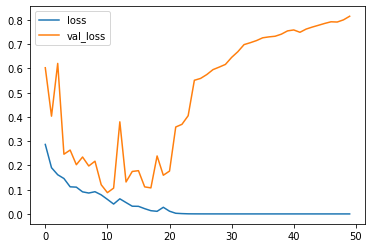

In [ ]:
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()


In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def predictImage(filename):
  img1 = image.load_img(filename,target_size=(150,150))
  plt.imshow(img1)
  Y= image.img_to_array(img1)
  X = np.expand_dims(Y,axis=0)
  val = model.predict(X)
  print(val)
  if val==1:
    plt.xlabel("no fire",frontsize=5)
    if val==0 :
      plt.xlabel("fire",frontsize=5)



Populating the interactive namespace from numpy and matplotlib


1/1 [==============================] - 0s 83ms/step
[[0.]]


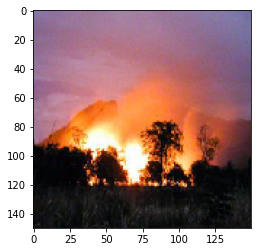

In [ ]:
predictImage("/content/drive/MyDrive/forest_fire/Testing/fire/abc183.jpg")

1/1 [==============================] - 0s 22ms/step
[[0.]]


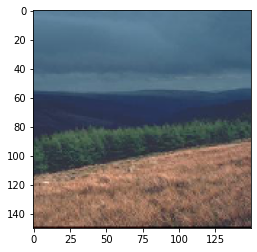

In [ ]:
predictImage("/content/drive/MyDrive/forest_fire/Testing/nofire/abc341.jpg")

In [ ]:
# predictImage("/content/drive/MyDrive/pic/download (1).jpg")

1/1 [==============================] - 0s 21ms/step
[[0.]]


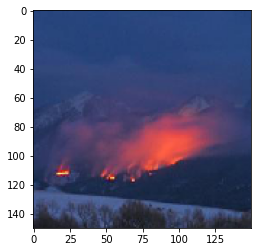

In [ ]:
predictImage("/content/drive/MyDrive/forest_fire/Testing/fire/abc180.jpg")

In [ ]:
# from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
# import numpy
# from sklearn import metrics
# plt.figure(figsize=(16,9))
# y_pre_label = [np.argmax(label) for label in predictions ]
# cm = confusion_matrix(predictions,y_pre_label)


# cm
# #

# # confusion_matrix = metrics.confusion_matrix(test_dataset,predictions)

# # cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

# # cm_display.plot()
# # plt.show()

In [ ]:
# from sklearn.metrics import classification_report
# target_names=  ['fire', 'nofire']

# cr = classification_report(test_dataset,y_pre_label,target_names)


# print(cr)

In [ ]:
# # confusion matrix in sklearn
# !pip install sklearn
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report

# # actual values
# # actual = [1,0,0,1,0,0,1,0,0,1]

# train_dataset
# # predicted values
# # predicted = [1,0,0,1,0,0,0,1,0,0]
# predictions

# x = train_dataset.iloc[:, :-1]
# y = predictions.iloc[:-1]

# # confusion matrix
# matrix = confusion_matrix(train_dataset,predictions)
# print('Confusion matrix : \n',matrix)

# # outcome values order in sklearn
# tp, fn, fp, tn = confusion_matrix(train_dataset,predictions,labels=[1,0]).reshape(-1)
# print('Outcome values : \n', tp, fn, fp, tn)

# # classification report for precision, recall f1-score and accuracy
# matrix = classification_report(train_dataset,predictions,labels=[1,0])
# print('Classification report : \n',matrix)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached sklearn-0.0.post1.tar.gz (3.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


AttributeError: ignored